In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import chdir
import matplotlib
matplotlib.style.use('ggplot')

In [34]:
%matplotlib inline

In [3]:
%pwd

u'C:\\Users\\Alexander\\Documents\\Programming\\DAT7\\DAT7project'

In [54]:
personal_victories = pd.read_csv(r'data/personalvictory.csv')

In [55]:
personal_victories.head()

,tweet_id,user_id,time_stamp,text,retweet_count,favorite_count
0,620608265953648641,2746104937,1436799515,#PersonalVictory I was at the grocery store an...,0,0
1,620089457765584896,2950708157,1436675822,"Sh*t night at home, but I still managed to sta...",0,0
2,619576854622552065,115852216,1436553607,Crossing things off of your to-do list that ha...,0,1
3,618255639932981248,17743037,1436238605,"At said new-to-me gym, I managed a 12:30 min m...",0,0
4,618226015689678848,2653394383,1436231542,"Nah. He may think they're attractive, but he'd...",2,1


In [56]:
#Convert timestamp
personal_victories['time_stamp'] = pd.to_datetime(personal_victories['time_stamp'], unit='s')

In [57]:
personal_victories.head()

,tweet_id,user_id,time_stamp,text,retweet_count,favorite_count
0,620608265953648641,2746104937,2015-07-13 14:58:35,#PersonalVictory I was at the grocery store an...,0,0
1,620089457765584896,2950708157,2015-07-12 04:37:02,"Sh*t night at home, but I still managed to sta...",0,0
2,619576854622552065,115852216,2015-07-10 18:40:07,Crossing things off of your to-do list that ha...,0,1
3,618255639932981248,17743037,2015-07-07 03:10:05,"At said new-to-me gym, I managed a 12:30 min m...",0,0
4,618226015689678848,2653394383,2015-07-07 01:12:22,"Nah. He may think they're attractive, but he'd...",2,1


##Count the number of victory posts

In [8]:
personal_victories.count()

tweet_id          3673
user_id           3673
time_stamp        3672
text              3672
retweet_count     3672
favorite_count    3672
dtype: int64

##Count average retweets

In [10]:
personal_victories.retweet_count.mean()

0.092047930283224402

In [11]:
personal_victories.retweet_count.sum()

338.0

##Count average favorites

In [13]:
personal_victories.favorite_count.mean()

0.53458605664488013

In [14]:
personal_victories.favorite_count.sum()

1963.0

##Plot tweets over time

In [28]:
personal_victories.time_stamp.min()

Timestamp('2009-11-07 00:01:27')

In [29]:
personal_victories.time_stamp.max()

Timestamp('2015-07-13 14:58:35')

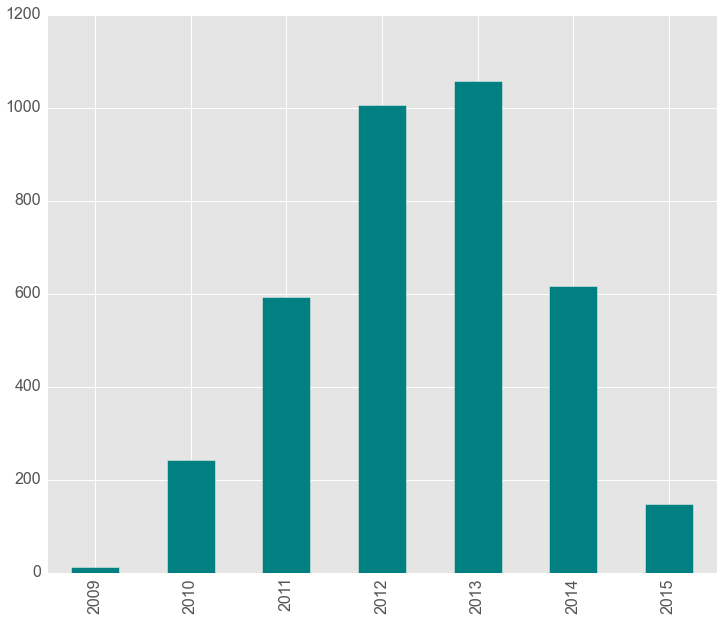

In [244]:
plt = personal_victories.time_stamp.dt.year.value_counts().sort_index().plot(kind='bar', 
                                                                       figsize=(12,10), 
                                                                       color='teal',
                                                                       fontsize='16')
plt.axes.set_xticklabels(['2009', '2010', '2011', '2012', '2013', '2014', '2015'], fontsize=16)

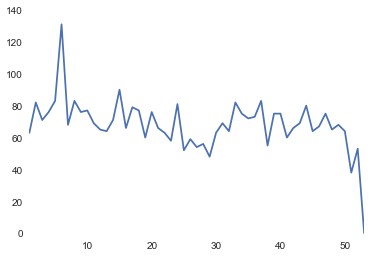

In [123]:
personal_victories.time_stamp.dt.weekofyear.value_counts().sort_index().plot()

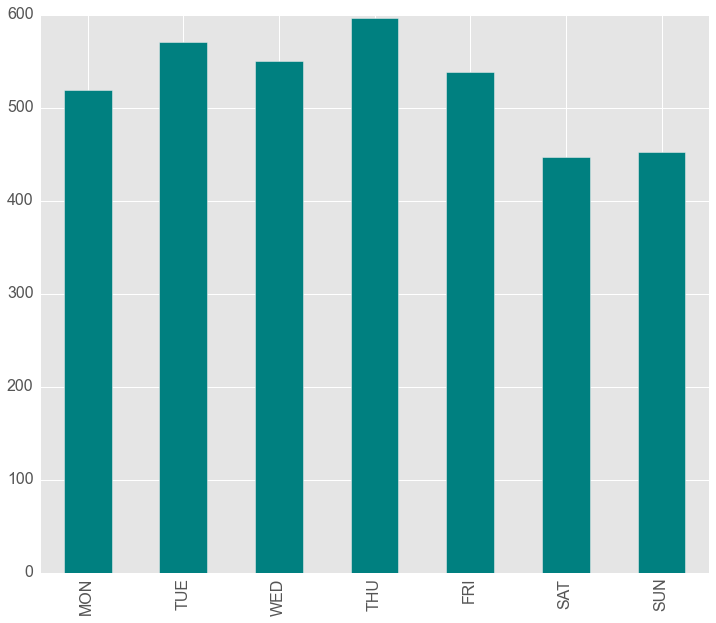

In [248]:
plt = personal_victories.time_stamp.dt.weekday.value_counts().sort_index().plot(kind='bar', 
                                                                       figsize=(12,10), 
                                                                       color='teal',
                                                                       fontsize='16')
plt.axes.set_xticklabels(['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'], fontsize=16)

##Check common tweet keywords

In [210]:
from sklearn.feature_extraction.text import CountVectorizer

In [216]:
cv = CountVectorizer(stop_words='english')

In [217]:
cv.fit_transform(personal_victories['text'][0:3672])

<3672x8424 sparse matrix of type '<type 'numpy.int64'>'
	with 28164 stored elements in Compressed Sparse Row format>

In [218]:
personal_victories_dtm = cv.fit_transform(personal_victories['text'][0:3672])

In [219]:
dtm_array = pd.DataFrame(personal_victories_dtm.toarray(), columns=cv.get_feature_names())
dtm_array

,00,000,000th,00am,02,026,03,035,04,05,...,احلى,اخر,اسحب,بالكفتيريا,شعور,لمن,ماي,واحد,ويكون,ℓσℓ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
personal_victories[['tweet_id','text']]

,tweet_id,text
0,620608265953648641,#PersonalVictory I was at the grocery store an...
1,620089457765584896,"Sh*t night at home, but I still managed to sta..."
2,619576854622552065,Crossing things off of your to-do list that ha...
3,618255639932981248,"At said new-to-me gym, I managed a 12:30 min m..."
4,618226015689678848,"Nah. He may think they're attractive, but he'd..."
5,616081531996471296,When you finally find cheap protein that doesn...
6,615648713302642688,"Mom: ""You're the best, I love being adults wit..."
7,615478040311799812,Thanks to @Flyteness1 spinach tasted real good...
8,614508555928932352,This afternoon @TimHannafin and I are getting ...
9,613733670457839618,Totally intruded on this dude's manspread on t...
